In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Sales_data_zone_wise.csv')

In [3]:
df.head()


,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


## Checking the mean sales generated by each zone

In [5]:
df2 = df.describe()
df2.round()

,Zone - A,Zone - B,Zone - C,Zone - D
count,29.0,29.0,29.0,29.0
mean,1540493.0,1755560.0,1772871.0,1842927.0
std,261940.0,168390.0,333194.0,375016.0
min,1128185.0,1527574.0,1237722.0,1234311.0
25%,1305972.0,1606010.0,1523308.0,1520406.0
50%,1534390.0,1740365.0,1767047.0,1854412.0
75%,1820196.0,1875658.0,2098463.0,2180416.0
max,2004480.0,2091194.0,2290580.0,2364132.0


In [6]:
# The mean sales generated by each column can be noted as in the table above

## Checking the total sales generated by all zones for each month

In [7]:
df3 = df.sum(axis=1)
df3.index = df3.index + 1
df4 = df3.to_frame(name="Total Monthly Sales")
df4

# Changing the index value from 0 to 1 for better understanding of data - starts from the 1st Month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Total Monthly Sales
1,7022544
2,7152303
3,6475939
4,8174449
5,5995328
6,7151387
7,7287108
8,7816299
9,6703395
10,7128210


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text major ticklabel objects>)

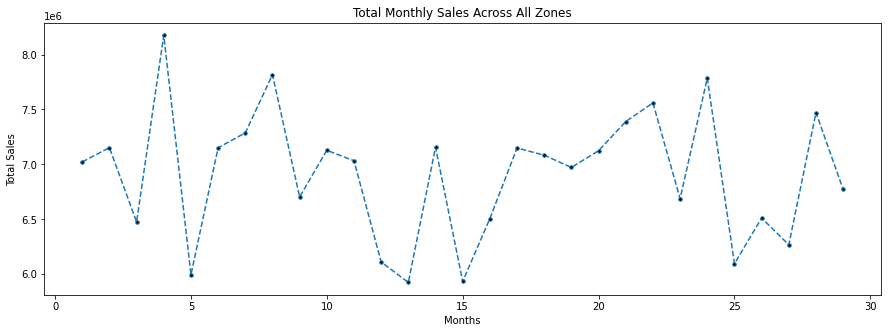

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(df4,marker='.',markerfacecolor='black',linestyle='dashed',markersize=7)
plt.title('Total Monthly Sales Across All Zones')
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.xticks()

## Checking whether all the zones generate the same amount of sales

In [10]:
# Performing One Way Anova Test to determine if the population means are the same 

In [11]:
# Null Hypothesis H0: u1=u2=u3=u4 i.e there is no variance across different zones A, B, C and D
# Alternate Hypothesis H1: not all means are equal 

In [12]:
group1 = df['Zone - A']
group2 = df['Zone - B']
group3 = df['Zone - C']
group4 = df['Zone - D']
from scipy.stats import f_oneway

f_oneway(group1, group2, group3, group4)



F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

In [13]:
# Since the p-value 0.0011 is lesser than the value of alpha (0.05), we reject the null hyptothesis and conclude that there is 
# enough statistical evidence that the different zones don't generate the same sales 